**CLUSTERING**

Con el objetivo de segmentar por países, se utilizará la técnica del Kmeans para poder analizar los países que tienen unas características parecidas en cuanto a la desigualdad y poder agruparlos para que sea más facil analizarlos.

In [ ]:
#Primer paso conectar al drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### importamos librería

#analisis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#librería básica de algoritmos
from sklearn.preprocessing import LabelEncoder,MinMaxScaler 

# python core library for machine learning and data science
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer

# time calculation to track some processes
import time

# 1. Importar Datos

In [ ]:
df_fa=pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_fa.csv")
#df_fa=pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/df_fa")

In [ ]:
df_fa

,Country,Power,Education,Money,Time,Health,Work,year,Sex
0,Austria,0.22,0.56,0.18,0.60,0.04,0.55,2021,W
1,Belgium,0.21,0.49,0.26,0.77,0.18,0.54,2021,W
2,Bulgaria,0.28,0.13,0.07,0.52,0.30,0.41,2021,W
3,Cyprus,0.14,0.33,0.13,0.61,0.21,0.68,2021,W
4,Czechia,0.14,0.32,0.28,0.40,0.18,0.37,2021,W
...,...,...,...,...,...,...,...,...,...
499,Portugal,0.86,0.32,0.09,0.36,0.48,0.69,2018,M
500,Romania,0.94,0.13,0.05,0.59,0.53,0.22,2018,M
501,Sweden,0.62,0.85,0.12,0.71,0.27,0.30,2018,M
502,Slovenia,0.86,0.49,0.21,0.64,0.18,0.43,2018,M


In [ ]:
df_year=df_fa[df_fa["Sex"]=="W"][["Country","year"]]


In [ ]:
df_fa_m=df_fa[(df_fa["Sex"]=="M")]
df_fa_w=df_fa[(df_fa["Sex"]=="W")]

In [ ]:
del df_fa_m["Sex"]
del df_fa_w["Sex"]
del df_fa_m["year"]
del df_fa_w["year"]


In [ ]:
df_fa_m.set_index("Country", inplace=True)
df_fa_w.set_index("Country", inplace=True)

In [ ]:
df_fa_dif=df_fa_m- df_fa_w
df_fa_dif

,Power,Education,Money,Time,Health,Work
Country,,,,,,
Austria,0.61,0.05,-0.04,0.07,-0.04,-0.10
Belgium,0.53,0.00,-0.02,0.12,0.02,-0.21
Bulgaria,0.54,0.00,-0.03,0.00,-0.08,-0.26
Cyprus,0.78,0.12,-0.03,0.07,-0.04,0.00
Czechia,0.84,0.09,-0.02,0.00,-0.01,-0.01
...,...,...,...,...,...,...
Portugal,0.71,0.02,-0.44,0.14,-0.02,-0.09
Romania,0.77,0.12,-0.46,0.16,-0.19,-0.20
Sweden,0.27,-0.07,-0.31,0.18,-0.13,-0.37


In [ ]:
df_fa_dif.reset_index(inplace=True)
df_fa_dif.head(30)

,Country,Power,Education,Money,Time,Health,Work
0,Austria,0.61,0.05,-0.04,0.07,-0.04,-0.10
1,Belgium,0.53,0.00,-0.02,0.12,0.02,-0.21
2,Bulgaria,0.54,0.00,-0.03,0.00,-0.08,-0.26
3,Cyprus,0.78,0.12,-0.03,0.07,-0.04,0.00
4,Czechia,0.84,0.09,-0.02,0.00,-0.01,-0.01
5,Germany,0.55,0.03,-0.01,0.05,0.01,-0.05
6,Denmark,0.51,-0.07,-0.01,0.26,0.02,-0.18
7,Estonia,0.69,0.01,-0.09,0.19,0.07,-0.33
8,Greece,0.80,0.06,-0.03,-0.01,-0.14,0.08
9,Spain,0.37,0.02,-0.06,0.03,0.07,-0.27


In [ ]:
df_fa_dif["year"]=df_year["year"]
df_fa_dif

,Country,Power,Education,Money,Time,Health,Work,year
0,Austria,0.61,0.05,-0.04,0.07,-0.04,-0.10,2021
1,Belgium,0.53,0.00,-0.02,0.12,0.02,-0.21,2021
2,Bulgaria,0.54,0.00,-0.03,0.00,-0.08,-0.26,2021
3,Cyprus,0.78,0.12,-0.03,0.07,-0.04,0.00,2021
4,Czechia,0.84,0.09,-0.02,0.00,-0.01,-0.01,2021
...,...,...,...,...,...,...,...,...
247,Portugal,0.71,0.02,-0.44,0.14,-0.02,-0.09,2014
248,Romania,0.77,0.12,-0.46,0.16,-0.19,-0.20,2014
249,Sweden,0.27,-0.07,-0.31,0.18,-0.13,-0.37,2014
250,Slovenia,0.75,-0.03,-0.19,0.17,0.05,-0.08,2014


In [ ]:
df_fa_dif.round(2).to_csv('/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_fa_dif.csv', index=False)

In [ ]:
df_fa_m21=df_fa[(df_fa["year"]==2021) & (df_fa["Sex"]=="M")]
df_fa_w21=df_fa[(df_fa["year"]==2021) & (df_fa["Sex"]=="W")]
df_fa_m20=df_fa[(df_fa["year"]==2020) & (df_fa["Sex"]=="M")]
df_fa_w20=df_fa[(df_fa["year"]==2020) & (df_fa["Sex"]=="W")]
df_fa_m19=df_fa[(df_fa["year"]==2019) & (df_fa["Sex"]=="M")]
df_fa_w19=df_fa[(df_fa["year"]==2019) & (df_fa["Sex"]=="W")]
df_fa_m18=df_fa[(df_fa["year"]==2018) & (df_fa["Sex"]=="M")]
df_fa_w18=df_fa[(df_fa["year"]==2018) & (df_fa["Sex"]=="W")]
df_fa_m17=df_fa[(df_fa["year"]==2017) & (df_fa["Sex"]=="M")]
df_fa_w17=df_fa[(df_fa["year"]==2017) & (df_fa["Sex"]=="W")]
df_fa_m16=df_fa[(df_fa["year"]==2016) & (df_fa["Sex"]=="M")]
df_fa_w16=df_fa[(df_fa["year"]==2016) & (df_fa["Sex"]=="W")]
df_fa_m15=df_fa[(df_fa["year"]==2015) & (df_fa["Sex"]=="M")]
df_fa_w15=df_fa[(df_fa["year"]==2015) & (df_fa["Sex"]=="W")]
df_fa_m14=df_fa[(df_fa["year"]==2014) & (df_fa["Sex"]=="M")]
df_fa_w14=df_fa[(df_fa["year"]==2014) & (df_fa["Sex"]=="W")]
df_fa_m13=df_fa[(df_fa["year"]==2013) & (df_fa["Sex"]=="M")]
df_fa_w13=df_fa[(df_fa["year"]==2013) & (df_fa["Sex"]=="W")]

In [ ]:
del df_fa_m21["year"]
del df_fa_w21["year"]
del df_fa_m20["year"]
del df_fa_w20["year"]
del df_fa_m19["year"]
del df_fa_w19["year"]
del df_fa_m18["year"]
del df_fa_w18["year"]
del df_fa_m17["year"]
del df_fa_w17["year"]
del df_fa_m16["year"]
del df_fa_w16["year"]
del df_fa_m15["year"]
del df_fa_w15["year"]
del df_fa_m14["year"]
del df_fa_w14["year"]
del df_fa_m13["year"]
del df_fa_w13["year"]

del df_fa_m21["Sex"]
del df_fa_w21["Sex"]
del df_fa_m20["Sex"]
del df_fa_w20["Sex"]
del df_fa_m19["Sex"]
del df_fa_w19["Sex"]
del df_fa_m18["Sex"]
del df_fa_w18["Sex"]
del df_fa_m17["Sex"]
del df_fa_w17["Sex"]
del df_fa_m16["Sex"]
del df_fa_w16["Sex"]
del df_fa_m15["Sex"]
del df_fa_w15["Sex"]
del df_fa_m14["Sex"]
del df_fa_w14["Sex"]
del df_fa_m13["Sex"]
del df_fa_w13["Sex"]

In [ ]:
for i in df_fa_m21.columns[1:]:
  df_fa_m21.rename(columns={i:i+"2021"},inplace=True)

In [ ]:
for i in df_fa_m20.columns[1:]:
  df_fa_m20.rename(columns={i:i+"2020"},inplace=True)

In [ ]:
for i in df_fa_m19.columns[1:]:
  df_fa_m19.rename(columns={i:i+"2019"},inplace=True)

In [ ]:
for i in df_fa_m18.columns[1:]:
  df_fa_m18.rename(columns={i:i+"2018"},inplace=True)

In [ ]:
for i in df_fa_m17.columns[1:]:
  df_fa_m17.rename(columns={i:i+"2017"},inplace=True)

In [ ]:
for i in df_fa_m16.columns[1:]:
  df_fa_m16.rename(columns={i:i+"2016"},inplace=True)

In [ ]:
for i in df_fa_m15.columns[1:]:
  df_fa_m15.rename(columns={i:i+"2015"},inplace=True)

In [ ]:
for i in df_fa_m14.columns[1:]:
  df_fa_m14.rename(columns={i:i+"2014"},inplace=True)

In [ ]:
for i in df_fa_m13.columns[1:]:
  df_fa_m13.rename(columns={i:i+"2013"},inplace=True)

In [ ]:
for i in df_fa_w21.columns[1:]:
  df_fa_w21.rename(columns={i:i+"2021"},inplace=True)

In [ ]:
for i in df_fa_w20.columns[1:]:
  df_fa_w20.rename(columns={i:i+"2020"},inplace=True)

In [ ]:
for i in df_fa_w19.columns[1:]:
  df_fa_w19.rename(columns={i:i+"2019"},inplace=True)

In [ ]:
for i in df_fa_w18.columns[1:]:
  df_fa_w18.rename(columns={i:i+"2018"},inplace=True)

In [ ]:
for i in df_fa_w17.columns[1:]:
  df_fa_w17.rename(columns={i:i+"2017"},inplace=True)

In [ ]:
for i in df_fa_w16.columns[1:]:
  df_fa_w16.rename(columns={i:i+"2016"},inplace=True)

In [ ]:
for i in df_fa_w15.columns[1:]:
  df_fa_w15.rename(columns={i:i+"2015"},inplace=True)

In [ ]:
for i in df_fa_w14.columns[1:]:
  df_fa_w14.rename(columns={i:i+"2014"},inplace=True)

In [ ]:
for i in df_fa_w13.columns[1:]:
  df_fa_w13.rename(columns={i:i+"2013"},inplace=True)

In [ ]:
df_unificado_women=pd.merge(df_fa_w21,df_fa_w20,how="left")

In [ ]:
df_unificado_women=pd.merge(df_unificado_women,df_fa_w19,how="left")

In [ ]:
df_unificado_women=pd.merge(df_unificado_women,df_fa_w17,how="left")

In [ ]:
df_unificado_women=pd.merge(df_unificado_women,df_fa_w15,how="left")

In [ ]:
df_unificado_women=pd.merge(df_unificado_women,df_fa_w13,how="left")

In [ ]:
df_unificado_women.head(2)

,Country,Power2021,Education2021,Money2021,Time2021,Health2021,Work2021,Power2020,Education2020,Money2020,...,Money2015,Time2015,Health2015,Work2015,Power2013,Education2013,Money2013,Time2013,Health2013,Work2013
0,Austria,0.22,0.56,0.18,0.60,0.04,0.55,0.22,0.55,0.20,...,0.80,0.63,0.10,0.37,0.17,0.47,0.18,0.60,0.13,0.43
1,Belgium,0.21,0.49,0.26,0.77,0.18,0.54,0.17,0.47,0.23,...,0.82,0.80,0.24,0.42,0.14,0.44,0.22,0.77,0.16,0.43


In [ ]:
df_unificado_women.set_index("Country", inplace=True)

In [ ]:
df_unificado_men=pd.merge(df_fa_m21,df_fa_m20,how="left")

In [ ]:
df_unificado_men=pd.merge(df_unificado_men,df_fa_m19,how="left")

In [ ]:
df_unificado_men=pd.merge(df_unificado_men,df_fa_m17,how="left")

In [ ]:
df_unificado_men=pd.merge(df_unificado_men,df_fa_m15,how="left")

In [ ]:
df_unificado_men=pd.merge(df_unificado_men,df_fa_m13,how="left")

In [ ]:
df_unificado_men.set_index("Country", inplace=True)

In [ ]:
df_unificado_men.head(2)

,Power2021,Education2021,Money2021,Time2021,Health2021,Work2021,Power2020,Education2020,Money2020,Time2020,...,Money2015,Time2015,Health2015,Work2015,Power2013,Education2013,Money2013,Time2013,Health2013,Work2013
Country,,,,,,,,,,,,,,,,,,,,,
Austria,0.83,0.61,0.14,0.67,0.0,0.45,0.84,0.60,0.14,0.64,...,0.18,0.62,0.13,0.32,0.92,0.53,0.14,0.62,0.13,0.36
Belgium,0.74,0.49,0.24,0.89,0.2,0.33,0.77,0.48,0.23,0.89,...,0.24,0.87,0.30,0.26,0.82,0.46,0.20,0.87,0.17,0.27


In [ ]:
df_unificado= df_unificado_men-df_unificado_women

In [ ]:
df_unificado.head()

,Power2021,Education2021,Money2021,Time2021,Health2021,Work2021,Power2020,Education2020,Money2020,Time2020,...,Money2015,Time2015,Health2015,Work2015,Power2013,Education2013,Money2013,Time2013,Health2013,Work2013
Country,,,,,,,,,,,,,,,,,,,,,
Austria,0.61,0.05,-0.04,0.07,-0.04,-0.10,0.62,0.05,-0.06,0.06,...,-0.62,-0.01,0.03,-0.05,0.75,0.06,-0.04,0.02,0.00,-0.07
Belgium,0.53,0.00,-0.02,0.12,0.02,-0.21,0.60,0.01,0.00,0.08,...,-0.58,0.07,0.06,-0.16,0.68,0.02,-0.02,0.10,0.01,-0.16
Bulgaria,0.54,0.00,-0.03,0.00,-0.08,-0.26,0.55,-0.02,-0.03,0.00,...,-0.81,0.06,-0.02,-0.19,0.66,-0.02,0.05,0.07,-0.03,-0.28
Cyprus,0.78,0.12,-0.03,0.07,-0.04,0.00,0.82,0.09,-0.01,0.08,...,-0.68,0.07,-0.06,0.09,0.92,0.13,0.03,0.07,-0.07,-0.01
Czechia,0.84,0.09,-0.02,0.00,-0.01,-0.01,0.82,0.09,-0.01,-0.01,...,-0.40,-0.08,-0.01,-0.03,0.84,0.06,-0.01,-0.02,-0.01,0.07


# 2. Análisis de Variables

## 2.1. Análisis de nulos

Segun el análisis de varianza para el cálculo de kmeans solo seleccionaremos aquellas que esten con una varianza superior a 4

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class Nuevas_Features(BaseEstimator, TransformerMixin):
   
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):

        variables=["Power","Money","Education","Health","Time","Work"]
        
        
        
        for i in variables:
          
          X[i+"_PEND3"]=(X[i+"2021"]-X[i+"2019"])/2 #CALCULO DE LA PENDIENTE 
          X[i+"_max"]=X[[i+"2021",i+"2020",i+"2019",i+"2017",i+"2015",i+"2013"]].max(axis=1)
          X[i+"_min"]=X[[i+"2021",i+"2020",i+"2019",i+"2017",i+"2015",i+"2013"]].min(axis=1)
          X[i+"_mean"]=X[[i+"2021",i+"2020",i+"2019"]].mean(axis=1) 
        
        for i in variables:
          del (X[i+"2021"])
          del (X[i+"2020"])
          del (X[i+"2019"])
          del (X[i+"2017"])
          del (X[i+"2015"])
          del (X[i+"2013"])

       
        return X
      

# Stop

In [ ]:
pipe = Pipeline(steps = [
    ("Nuevas_Features", Nuevas_Features()),
    ("StandardScaler", StandardScaler())
])

In [ ]:
df_scaled_transformed = pipe.fit_transform(df_unificado)

In [ ]:
df_scaled_transformed

array([[ 1.28954508e-01,  5.13882485e-02,  7.16114874e-02,
        -4.96594924e-03, -1.24738176e+00, -3.96591047e-01,
         2.29315284e-01, -6.46579087e-01,  1.58113883e+00,
         4.34578986e-01,  3.73627936e-01,  3.96804415e-01,
        -8.41191024e-01, -1.07520666e-01, -6.75382818e-03,
        -3.60866054e-01, -4.92664639e-02, -2.80833509e-01,
        -3.02320772e-01, -2.90078364e-02,  7.82890352e-01,
         3.16347290e-01,  3.06168359e-01,  2.72441426e-01],
       [-1.14541946e+00, -4.52216587e-01, -4.00181841e-01,
        -2.43331513e-01, -8.94586921e-01, -1.36755533e-02,
         5.05479926e-01,  4.84934315e-01, -2.63523138e-01,
        -7.77667658e-02,  2.35975538e-01, -4.76165298e-02,
         9.94134847e-01,  4.56962831e-01, -1.95861017e-01,
        -2.96915108e-01,  1.33019453e+00,  3.53306673e-01,
         6.93559419e-01,  3.12979288e-01,  1.62486677e-01,
        -4.63578104e-01, -3.22497338e-01, -2.98258818e-01],
       [ 7.66141490e-01, -5.96103683e-01, -3.41207675e

In [ ]:
CALCULATE_ELBOW = True

In [ ]:
if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 15):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k,random_state=5)

        clustering_model.fit(df_scaled_transformed)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

  #c5  5 15 12 29 22 14 12 26 54 63
  #c4 87 67 13 65 67

  #33, 99, 555, 44 111 1 2  123 12 17  26 41 47 56 59 61

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Elbow curve took 0 minutes.


In [ ]:
sse

{2: 518.6291712499221,
 3: 452.51783669499105,
 4: 388.22763861675116,
 5: 336.4558613907725,
 6: 329.97203233638595,
 7: 300.50625207065355,
 8: 264.28471067412283,
 9: 240.60975808067928,
 10: 216.66082828650616,
 11: 190.45605805084398,
 12: 176.0595186670257,
 13: 161.86507850332646,
 14: 139.73271024473019}

# Elbow curve

En esta sección vamos a visualizar nuestro ***Elbow Curve*** y buscaremos el punto de inflexión que será nuestro número de centroides.

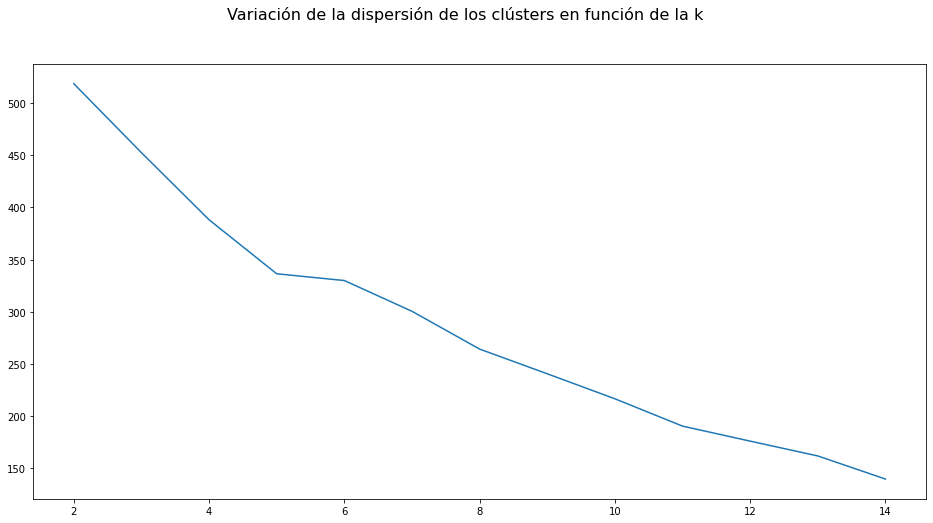

In [ ]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

# Segmentación de los country con la "k adecuada"

Ahora que hemos determinado el número de centroides correcto podemos fittear nuestro pipeline con la k adecuada.

Dado que vamos a realizar nuestra segmentación con KMeans y vamos a suministrarle las variables de nuestro interés, a veces, a KMeans se le conoce como segmentación no supervisada pero guiada*. Guiada porque de alguna manera el data scientist le dice (lo guía) a que discrimine usando unas variables y no otras.

In [ ]:
pipe = Pipeline(steps = [
    ("Nuevas_Features", Nuevas_Features()),
    ("StandardScaler", StandardScaler()),
    ("Clustering", KMeans(n_clusters = 5))
])

In [ ]:
pipe.fit(df_unificado)

Pipeline(steps=[('Nuevas_Features', Nuevas_Features()),
                ('StandardScaler', StandardScaler()),
                ('Clustering', KMeans(n_clusters=5))])

In [ ]:
df_unificado.head()

,Power_PEND3,Power_max,Power_min,Power_mean,Money_PEND3,Money_max,Money_min,Money_mean,Education_PEND3,Education_max,...,Health_min,Health_mean,Time_PEND3,Time_max,Time_min,Time_mean,Work_PEND3,Work_max,Work_min,Work_mean
Country,,,,,,,,,,,,,,,,,,,,,
Austria,-0.015,0.75,0.61,0.623333,-0.020,0.00,-0.62,-0.033333,0.020,0.08,...,-0.04,-0.020000,-0.005,0.08,-0.01,0.070000,0.010,-0.01,-0.15,-0.123333
Belgium,-0.045,0.68,0.53,0.583333,-0.015,0.01,-0.58,-0.003333,-0.005,0.04,...,-0.05,-0.016667,0.015,0.13,0.07,0.096667,-0.005,-0.15,-0.26,-0.223333
Bulgaria,0.000,0.66,0.54,0.543333,-0.005,0.05,-0.81,-0.026667,0.025,0.01,...,-0.08,-0.056667,-0.005,0.07,0.00,0.003333,0.025,-0.19,-0.31,-0.273333
Cyprus,-0.020,0.92,0.78,0.806667,-0.010,0.03,-0.68,-0.016667,0.015,0.14,...,-0.07,-0.036667,-0.025,0.12,0.07,0.090000,-0.015,0.09,-0.01,0.023333
Czechia,0.015,0.85,0.81,0.823333,-0.010,0.00,-0.40,-0.010000,0.000,0.09,...,-0.02,0.000000,0.005,0.00,-0.08,-0.006667,0.015,0.07,-0.04,-0.023333


In [ ]:
pipe["Clustering"].cluster_centers_

array([[ 4.47547999e-01,  6.50917815e-01,  8.87420785e-01,
         8.39245421e-01, -3.65394658e-01,  1.77782193e-01,
         5.74521087e-01,  1.07763181e-01,  2.89875452e-01,
         1.35710631e-01,  1.21265207e-01,  3.47424310e-01,
        -1.78434460e-01,  2.37441471e-01,  5.29049874e-01,
         4.81154738e-01,  4.10553866e-01, -8.93835686e-01,
        -7.79513364e-01, -7.20106817e-01,  5.90860643e-02,
         4.18480377e-01,  5.72875018e-01,  5.10233194e-01],
       [-1.80886414e-02, -1.36771800e-01, -2.23259343e-01,
        -2.17355778e-01,  3.53764059e-01,  4.52345226e-02,
        -1.79620822e-01,  1.46447400e-01, -1.50005479e-01,
         2.96639745e-01,  3.31273352e-01,  2.03082465e-01,
         5.88245471e-03, -3.24629703e-01, -1.52220897e-01,
        -2.13286947e-01, -3.41075519e-01,  1.19162606e-01,
         2.05195094e-01,  4.66239314e-02, -6.02223348e-02,
         7.20849413e-02, -4.11364666e-02,  1.72464359e-03],
       [ 4.12148723e-01, -2.03497464e+00, -1.56000711e

In [ ]:
X_scaled = pipe["StandardScaler"].transform(df_unificado)


In [ ]:
labels = pipe["Clustering"].predict(X_scaled)

le asignamos al DataFrame procesado los centroides.
SI LO HACEMOS AL ESCALADO LOS NÚMEROS PERDERAN SU SIGNIFICADO ESCALA Y SERÁN MÁS DÍFICILES DE INTERPRETAR.


In [ ]:
df_unificado["cluster"] = labels

In [ ]:
df_Kmeans= df_unificado.copy()
df_Kmeans

,Power_PEND3,Power_max,Power_min,Power_mean,Money_PEND3,Money_max,Money_min,Money_mean,Education_PEND3,Education_max,...,Health_mean,Time_PEND3,Time_max,Time_min,Time_mean,Work_PEND3,Work_max,Work_min,Work_mean,cluster
Country,,,,,,,,,,,,,,,,,,,,,
Austria,-0.015,0.75,0.61,0.623333,-0.020,0.00,-0.62,-3.333333e-02,2.000000e-02,0.08,...,-2.000000e-02,-5.000000e-03,0.08,-0.01,0.070000,0.010,-0.01,-0.15,-0.123333,0
Belgium,-0.045,0.68,0.53,0.583333,-0.015,0.01,-0.58,-3.333333e-03,-5.000000e-03,0.04,...,-1.666667e-02,1.500000e-02,0.13,0.07,0.096667,-0.005,-0.15,-0.26,-0.223333,1
Bulgaria,0.000,0.66,0.54,0.543333,-0.005,0.05,-0.81,-2.666667e-02,2.500000e-02,0.01,...,-5.666667e-02,-5.000000e-03,0.07,0.00,0.003333,0.025,-0.19,-0.31,-0.273333,1
Cyprus,-0.020,0.92,0.78,0.806667,-0.010,0.03,-0.68,-1.666667e-02,1.500000e-02,0.14,...,-3.666667e-02,-2.500000e-02,0.12,0.07,0.090000,-0.015,0.09,-0.01,0.023333,1
Czechia,0.015,0.85,0.81,0.823333,-0.010,0.00,-0.40,-1.000000e-02,0.000000e+00,0.09,...,0.000000e+00,5.000000e-03,0.00,-0.08,-0.006667,0.015,0.07,-0.04,-0.023333,0
Germany,0.000,0.68,0.55,0.550000,0.020,-0.01,-0.67,-2.666667e-02,-1.000000e-02,0.08,...,3.333333e-03,-1.000000e-02,0.12,0.04,0.080000,0.000,0.08,-0.06,-0.030000,1
Denmark,0.000,0.58,0.51,0.513333,0.015,-0.01,-0.53,-2.333333e-02,5.000000e-03,-0.07,...,4.666667e-02,-1.000000e-02,0.31,0.22,0.280000,-0.030,-0.08,-0.18,-0.160000,2
Estonia,-0.020,0.80,0.69,0.713333,-0.005,-0.01,-0.73,-6.666667e-02,1.000000e-02,0.01,...,5.000000e-02,-5.000000e-03,0.20,-0.01,0.166667,0.040,-0.33,-0.41,-0.380000,4
Greece,-0.010,0.87,0.80,0.806667,0.010,-0.03,-0.89,-4.000000e-02,-5.000000e-03,0.11,...,-1.266667e-01,-2.000000e-02,0.03,-0.03,0.000000,-0.010,0.24,0.08,0.093333,3


In [ ]:
df_Kmeans.reset_index().round(2).to_csv('/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_Kmeans5.csv', index=False)

In [ ]:
df_Kmeans.reset_index(inplace=True)

 mapa con clusters
 explicacion de que mejoras puede hacer cada cluster para llegar al 2030 sumado a lo de series temporales para ver conclusiones
 


In [ ]:
!pip install calmap
!pip install geopandas
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 27.1 MB/s 
     |████████████████████████████████| 6.3 MB 50.4 MB/s 
     |████████████████████████████████| 16.7 MB 66.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0b2b05a7d866b26214fa56cbef3caaa9138d884f53fcb2174ed7d787dd44f33b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import calmap
import folium
import wget
import os
import plotly.express as px
import geopandas as gpd

In [ ]:
Clusters = px.choropleth(df_Kmeans, locations="Country",
                    locationmode='country names', color="cluster", 
                    hover_name="Country", range_color=[0,5],  
                    color_continuous_scale= None,
                    title='Clusters',) 

In [ ]:
Clusters

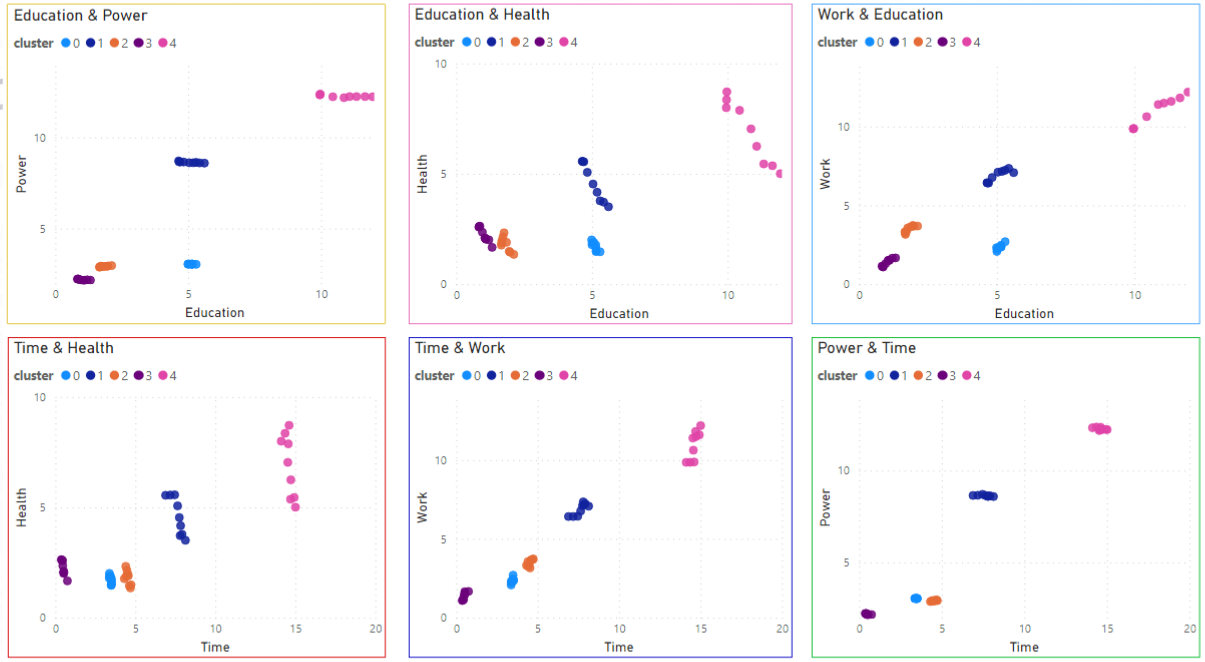

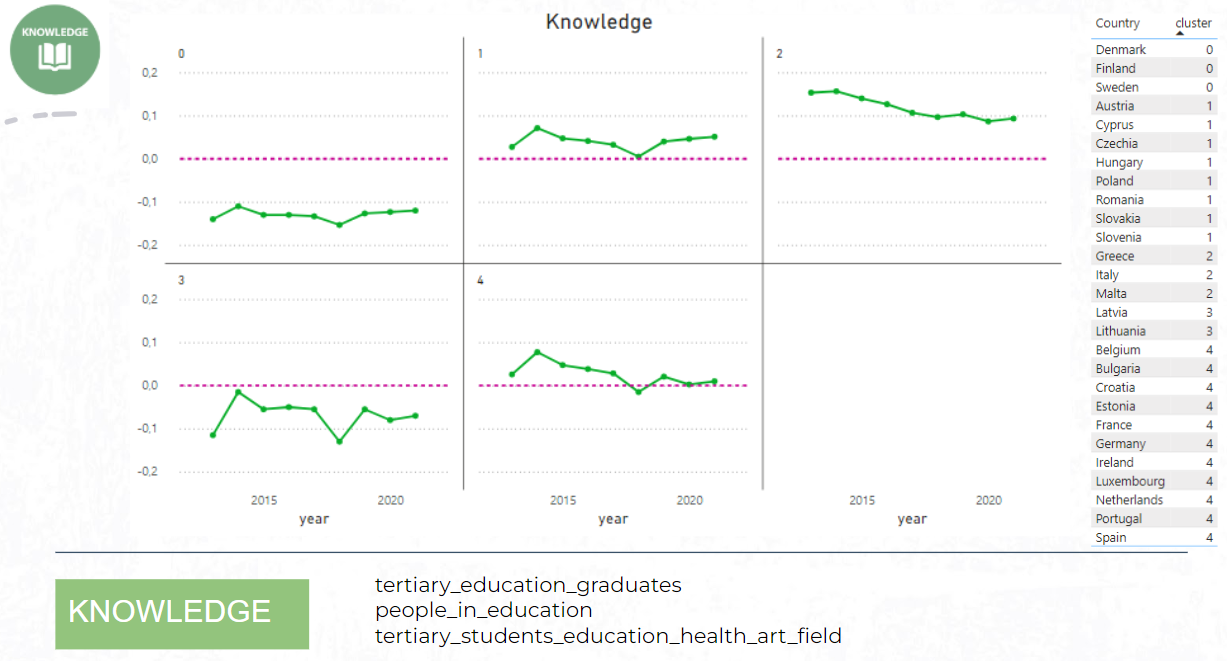

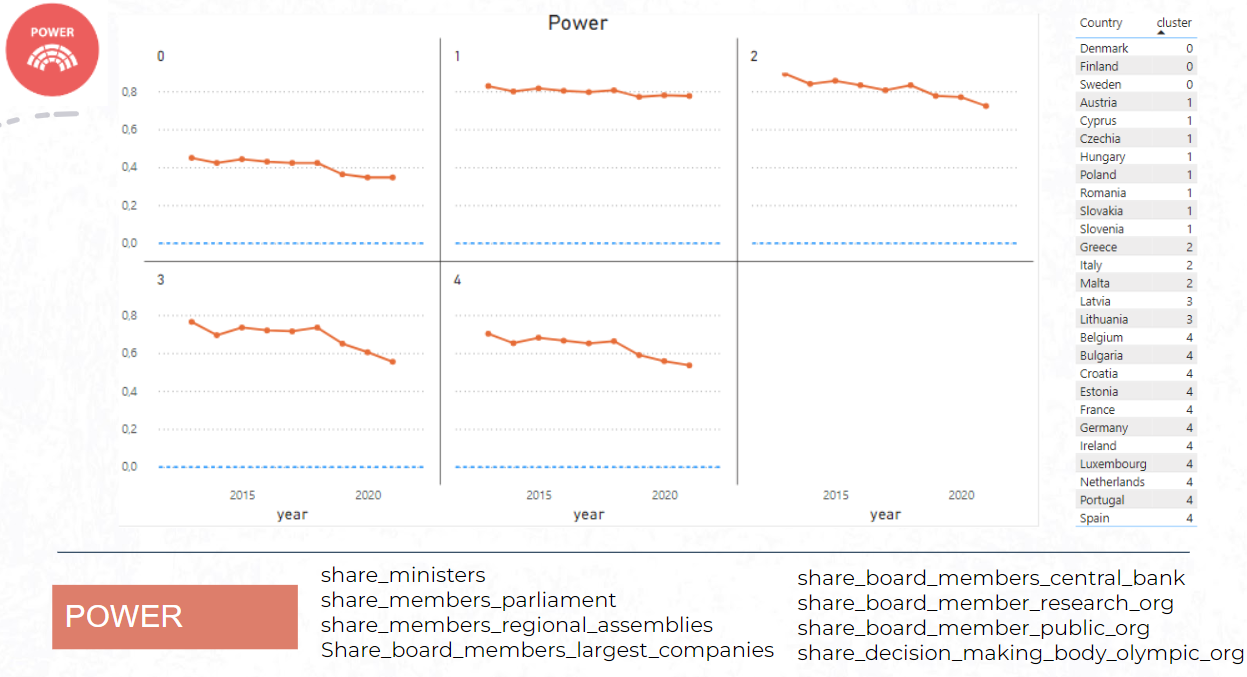

En la siguiente noticia Se puede ver que en el caso del cluster 1 donde Rumania y Chipre esta en el peor escenario, ademas se observa claramente la composicion del parlamento y por ello la gran desigualdad que hoy tenemos con una mejora a nivel general en los ultimos tres años ya que estas dos mujeres en posiciones de poder (Ursula y Roberta).

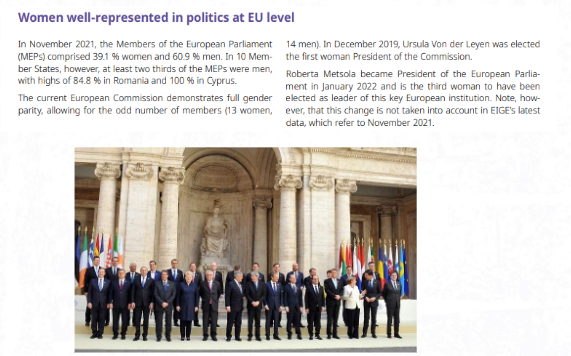

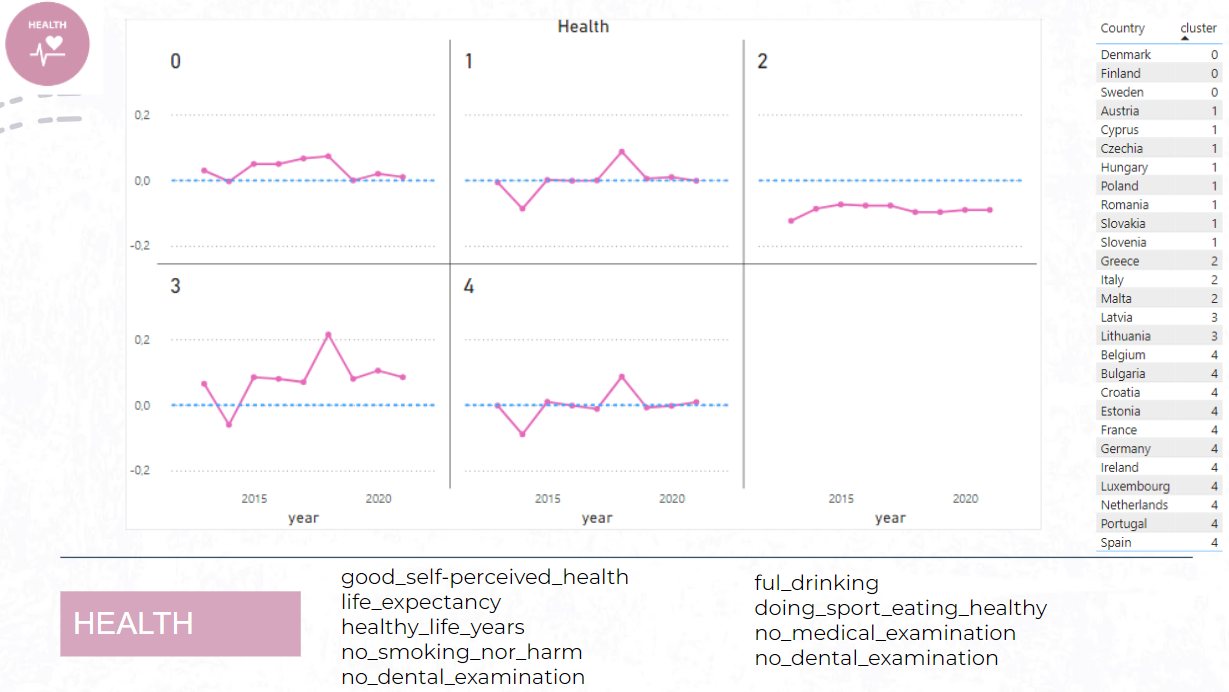

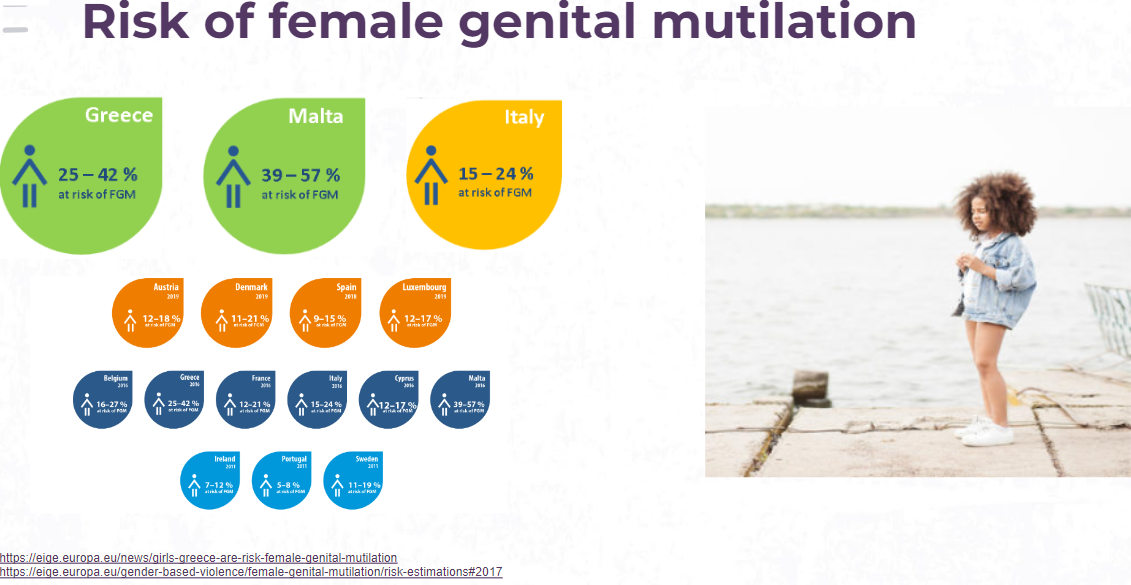

Aqui en este articulo se observa porque el Cluster dos esta la desigualdad en la mujer ya que toma mas peso la variable de no_medical_examination

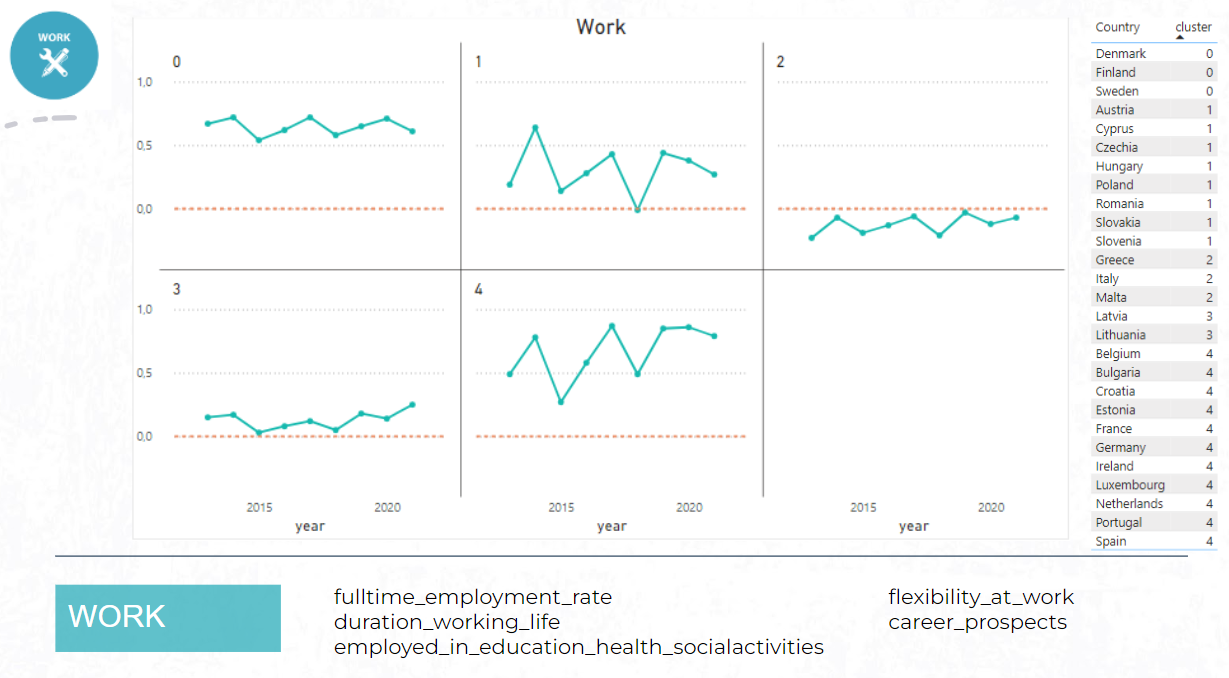

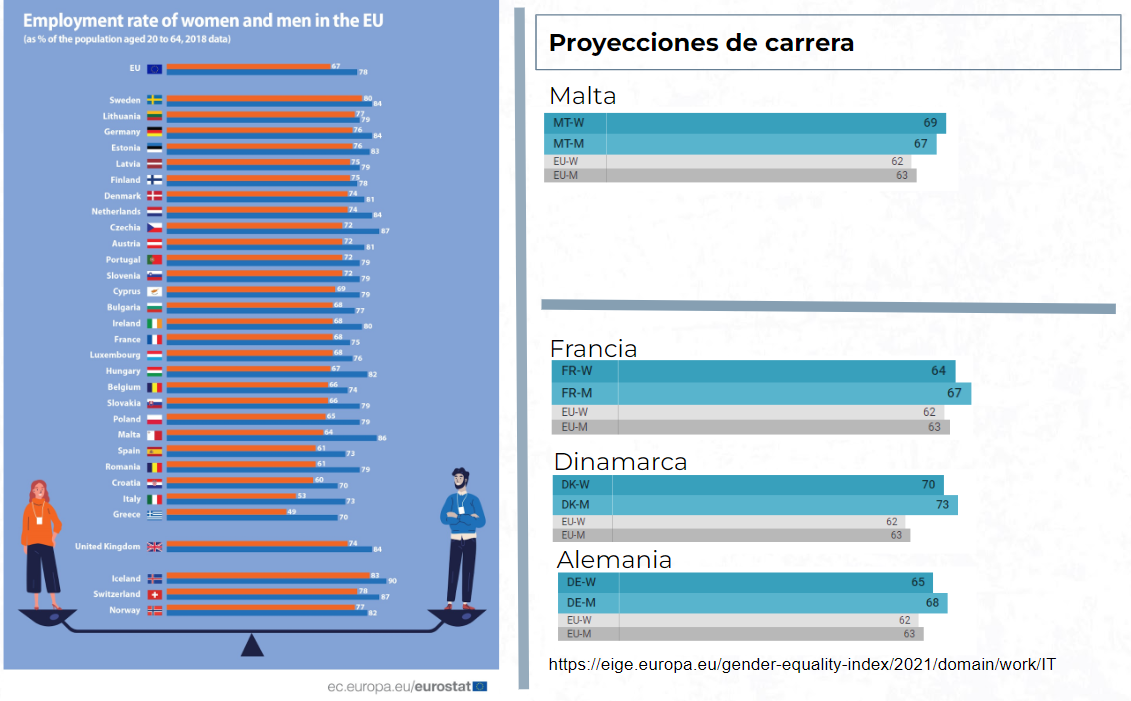

Aqui viendo estas cifras se observa claramente una desigualdad por parte del hombre lo que explica la situacion general de los cluster y en particular caso en el Cluster 2 que las proyecciones de carrera son mayores para la mujer que para el hombre por lo que muestra que tiene sentido el resultado obtenido

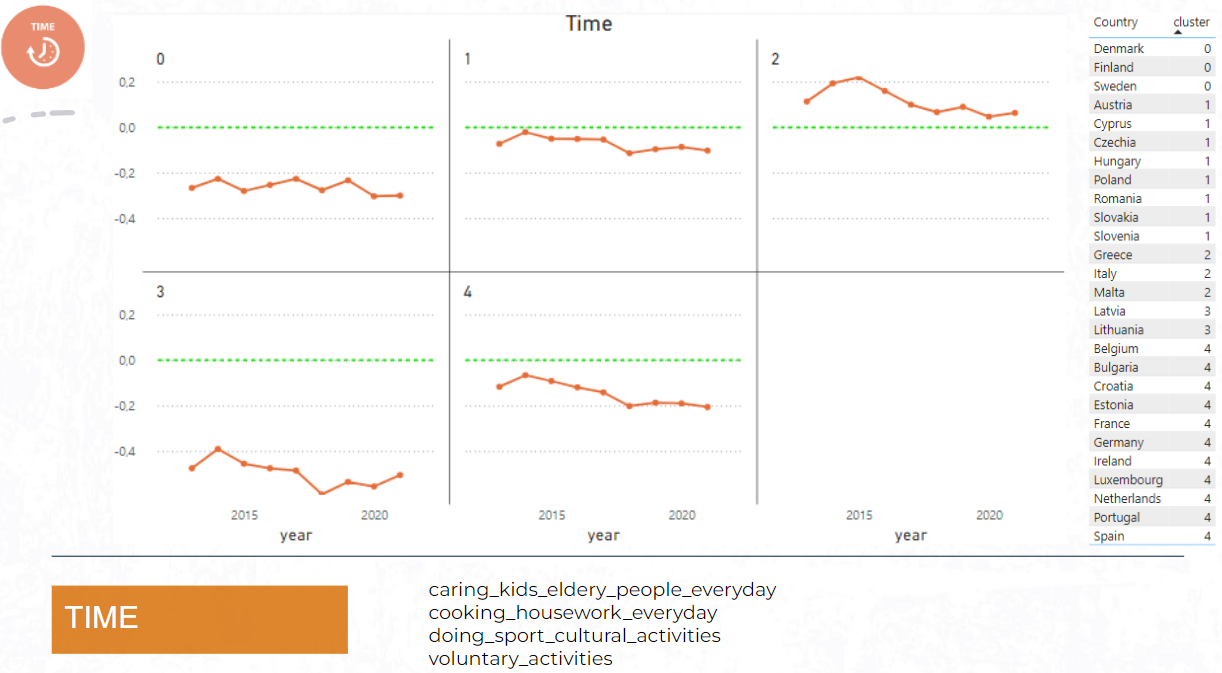

# Conclusiones

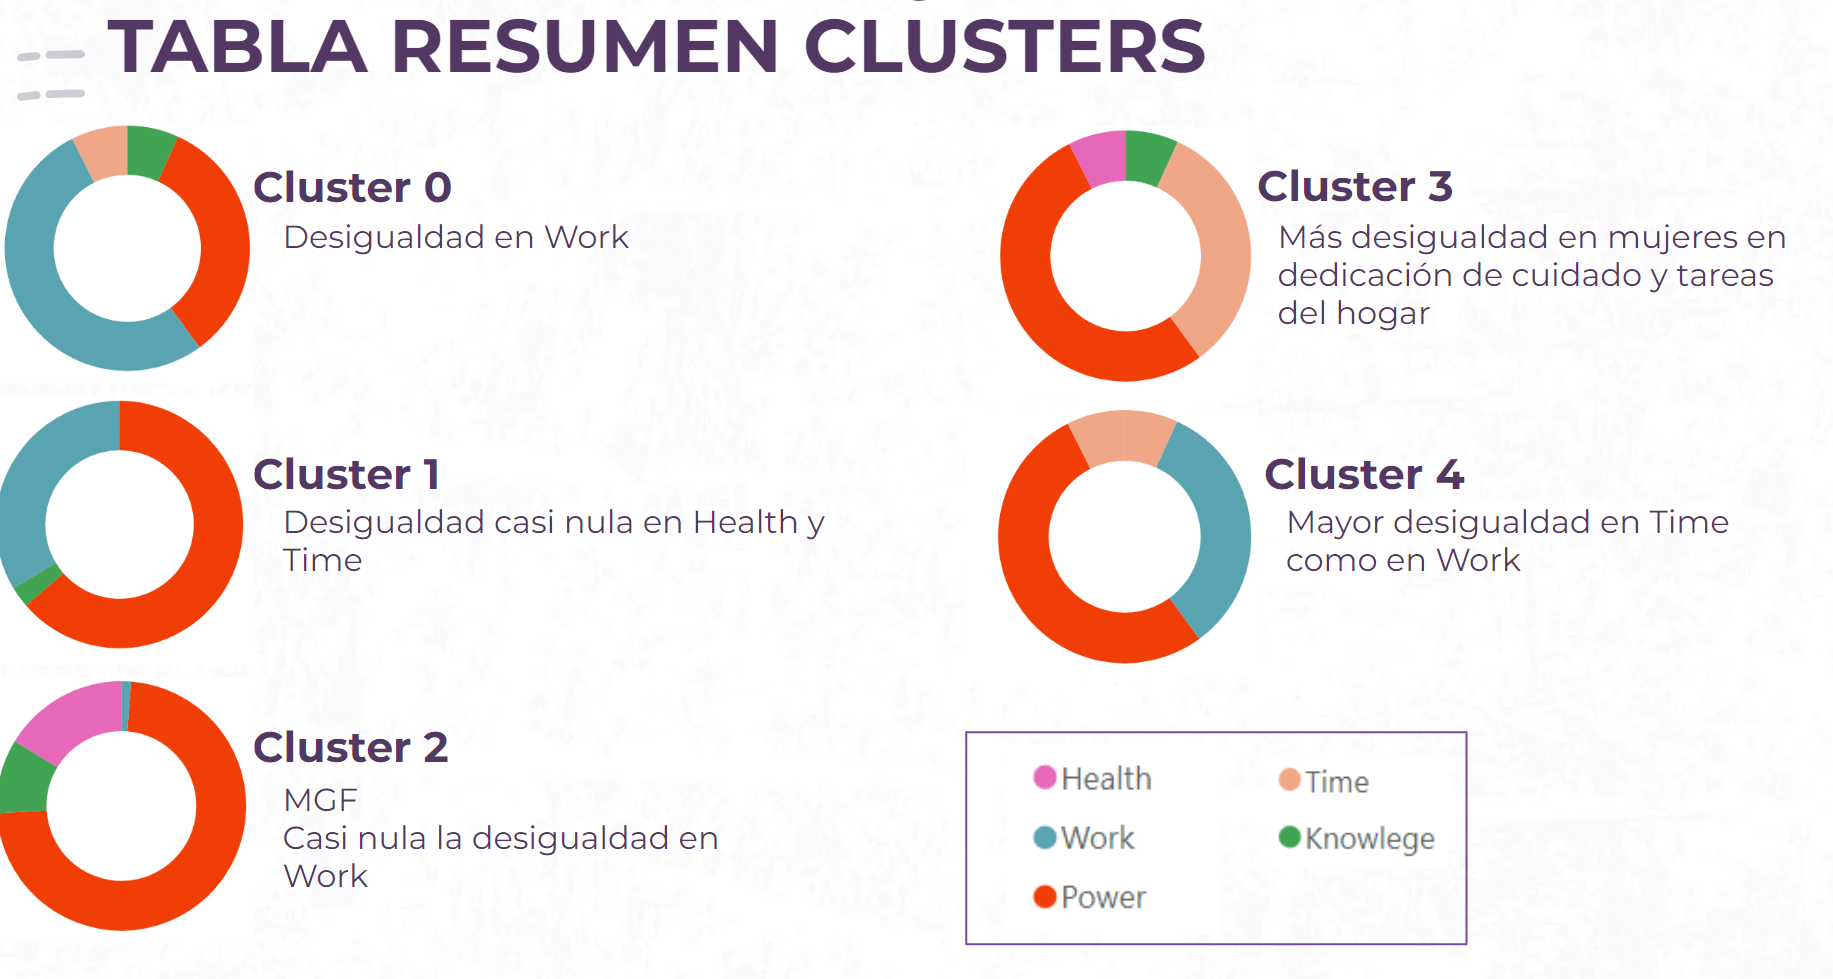